# Dragon Reak Estate - Price Predictor

In [1]:
# import libraris
import pandas as pd
import numpy as np

In [2]:
housuing = pd.read_csv('data.csv')

In [3]:
housuing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
housuing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
'''
1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
    
'''

"\n1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks \n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1000's\n    \n"

In [6]:
housuing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
housuing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
housuing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
housuing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283758,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705124,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
housuing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283758,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705124,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
housuing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283758,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705124,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200AAB766C8>,
      dtype=object)

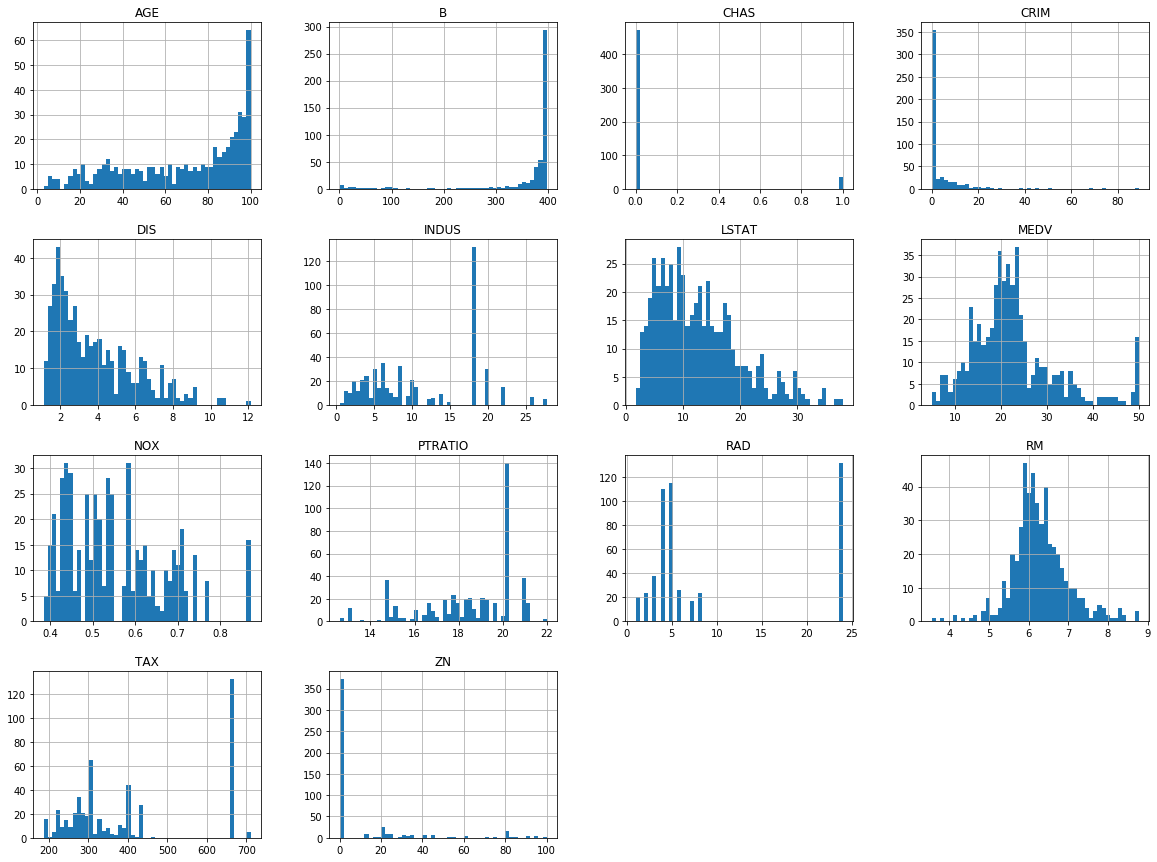

In [13]:
import matplotlib.pyplot as plt
housuing.hist(bins=50, figsize=(20,15))

## Splitting Train and test data


In [14]:
# For learning perpose
'''
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
'''

'\ndef split_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\n'

In [15]:
'''Ye model sii to he per ho ga kya kii jab aap ise bare bare run kero ge to kabhi na kabhi to esa ho ga hii 
ki aap ka jo test ka data he vo bhi train me chala jaee kuu ki ye to randomly data divide kere to hamara test data bhii
kabhii na kabhii machine dekhe hii legii to ye to problem he kuuu ki jo data hame nehii dikhana he vo bhi hamra model
pele se hii dekhe lega or hamara modele sii se kam nii kere ga or ise se overfitting ho seketi he 

np.random.seed(42)

ye use ker ne se hamarii problem solve ho jae gii kuu ki ye randomly eke bare 
test or train ko divide ker ta he to vo fix ho jatiii he fir unhii me shuffle ker ta reta he

or (42) ye jo value he ise aap kuch bhii rekhe sakete he  
'''

'Ye model sii to he per ho ga kya kii jab aap ise bare bare run kero ge to kabhi na kabhi to esa ho ga hii \nki aap ka jo test ka data he vo bhi train me chala jaee kuu ki ye to randomly data divide kere to hamara test data bhii\nkabhii na kabhii machine dekhe hii legii to ye to problem he kuuu ki jo data hame nehii dikhana he vo bhi hamra model\npele se hii dekhe lega or hamara modele sii se kam nii kere ga or ise se overfitting ho seketi he \n\nnp.random.seed(42)\n\nye use ker ne se hamarii problem solve ho jae gii kuu ki ye randomly eke bare \ntest or train ko divide ker ta he to vo fix ho jatiii he fir unhii me shuffle ker ta reta he\n\nor (42) ye jo value he ise aap kuch bhii rekhe sakete he  \n'

In [16]:
'''Uper jo bhii hamene kam abhii kera he vo pele se hii sklearn me avlable he
to ab hum use use kerenge'''

'Uper jo bhii hamene kam abhii kera he vo pele se hii sklearn me avlable he\nto ab hum use use kerenge'

In [17]:
# Total Data = 100% /// train = 80% //// test= 20%
# train_set, test_set = split_train_test(housuing,0.2)

In [18]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [19]:
# # LEarning Purpose
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housuing, test_size=0.2, random_state=42)

In [20]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [21]:
'''
0    471
1     35
Name: CHAS, dtype: int64
'''

'''
jese kii "CHAS" me hum dekhe te he kiii 0-> 471 OR 1-> 35 ite times he per ager 
jab hum apne data ko train or test me divide ker te he esa bhii ho seketa he kii 
aap ke sare 0 value test me chale jaee ya fir sare 1 vali value kisi eke me hii chele jae
to ise se kabhiii vo dusere data ko dekhe hii ni paega or hamara model gelet jaega is liye 
hum "StratifiedShuffleSplit"
'''


'\njese kii "CHAS" me hum dekhe te he kiii 0-> 471 OR 1-> 35 ite times he per ager \njab hum apne data ko train or test me divide ker te he esa bhii ho seketa he kii \naap ke sare 0 value test me chale jaee ya fir sare 1 vali value kisi eke me hii chele jae\nto ise se kabhiii vo dusere data ko dekhe hii ni paega or hamara model gelet jaega is liye \nhum "StratifiedShuffleSplit"\n'

In [22]:
housuing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283758,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705124,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housuing,housuing['CHAS']): # "CHAS ke adhar pe ker na he"
    strat_train_set = housuing.loc[train_index]
    strat_test_set = housuing.loc[test_index]

In [24]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [25]:
strat_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


In [26]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [27]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.302188,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.666198,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.167000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [29]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [30]:
95/7


13.571428571428571

In [31]:
376/28
# Dono ka bara ber ratio liya he aap dekhe sakete he

13.428571428571429

In [32]:
housuing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283758,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705124,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
# sara kam heme train set ke sathe ker na he is ise use kernege
housuing = strat_train_set.copy()


## Looking for Correlations

In [34]:
coo_matrix = housuing.corr()

In [35]:
coo_matrix = housuing.corr()

# high positive  collrelation "MEDV"
# high negetive  collrelation 
"""coor -> ager app eke chijhe ko incrise ker te 
ho to duseri in cress hogi ya decress ye correlation hota he"""

coo_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678807
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [36]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200AE90E808>,
      dtype=object)

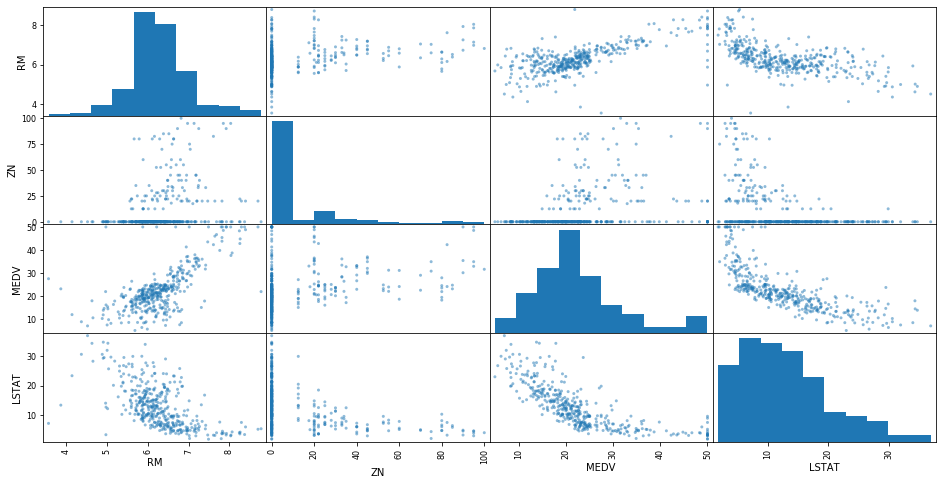

In [37]:
attributes = ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housuing[attributes], figsize=(16,8))

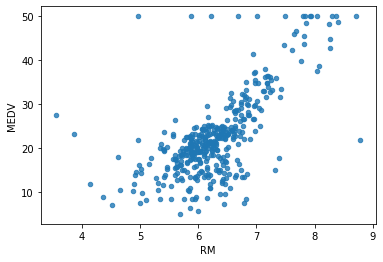

In [38]:
housuing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
# color dark ker ne ke liye

In [39]:
# coor or Scatter plot is liye banate kuu ki aap outliers ko hata sakete ho

## Trying Attribute Combinations

In [40]:
# ye is liye ki shyed Attribute combination 
# se data or hamara acha ho jae or model or acha bane

In [41]:
housuing["TAXRM"] = housuing['TAX']/housuing['RM']

In [42]:
housuing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [43]:
# housuing.head()
# # ise ke bade vapes se correlation kero

In [44]:
coo_matrix = housuing.corr()

# # high positive  collrelation "MEDV"
# # high negetive  collrelation 
# """coor -> ager app eke chijhe ko incrise ker te 
# ho to duseri in cress hogi ya decress ye correlation hota he"""

coo_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678807
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524354
LSTAT     -0.740494
Name: MEDV, dtype: float64

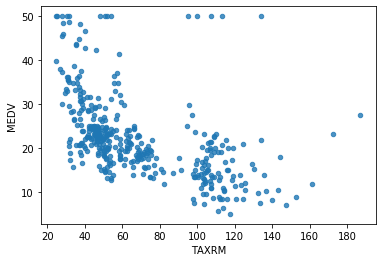

In [45]:
housuing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [46]:
housuing = strat_train_set.drop("MEDV",axis=1)
housuing_labels = strat_train_set["MEDV"].copy()

In [47]:
housuing_labels.shape

(404,)

## Missing Attributes

In [48]:
# To take care of missing attributes, you have three options:
#     1. get rid of the missing data points
#     2. get rid of the whole attribute
#     3. set the value to some value(0,mean or median)

In [49]:
housuing.shape

(404, 13)

In [50]:
a = housuing.dropna(subset=["RM"]) # """, inplace==True""") # option 1
a.shape

(400, 13)

In [51]:
b = housuing.drop("RM",axis=1) # option 2
b.shape
# # NOte that there is no RM colum

(404, 12)

In [52]:
median =  housuing["RM"].median() # option 3 MEdian

In [53]:
median

6.21

In [54]:
# housuing["RM"].fillna(median).shape
housuing["RM"].fillna(median)
# # note That the orignal dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

Esa ker ne se ager aap traning data ko use ker ke mean nikal re ho to aap ko test data me ye value dale nii pede gii or bare bare time isi me lage jae ga

In [55]:
'''
uper jo kera vo to kisi eke colum me ho to eke eke ker ke use ker na he 

per ager eke se jyada colum me missing value ho or jab new data or apne add kere use
me bhii ager missing value ho to hame bare bare ye kam na ker na ker na pede
is liye hum hm esa funtion jo apne aap hi ye kam ker ta rehe
'''

'\nuper jo kera vo to kisi eke colum me ho to eke eke ker ke use ker na he \n\nper ager eke se jyada colum me missing value ho or jab new data or apne add kere use\nme bhii ager missing value ho to hame bare bare ye kam na ker na ker na pede\nis liye hum hm esa funtion jo apne aap hi ye kam ker ta rehe\n'

In [56]:
housuing.describe() # before we started filling missing attributes 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279105,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715344,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [57]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housuing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [58]:
housuing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279105,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715344,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [59]:
# # Kiteni values  calculate keri he
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [60]:
# housuing.shape

In [61]:
# housuing.describe()

In [62]:
# yeha jake misssing value fill hogi
x = imputer.transform(housuing)


In [63]:
# # ye kam trainge data ke sathe ker na he
#  ye kam orignel data me ni hua he "housuing_tr" sara kam ise me copy ker ke kera he
housuing_tr = pd.DataFrame(x,columns=housuing.columns)

In [64]:
housuing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278421,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711818,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarly, therr types of objects
1. Estimators - It estimates some parameter based on a sataset. Eg. imputer

It has a fit methord and transform methord

fit method - Fits the datasets and calculates internal parameters

2. Transformers - transfrom method takes input and return output based on the learning from fit(). It also has a convenience funtion called fit_transfrom() which fits and then transfroms.



3. predictors - LinearRegression model is an example of predictor. fit() and predict() are two common funtion. It also gives score() funtion which will evaluate the predictions.

## Feature Scaling

### Same Scalling ker ne ke liye use ker te he
Primarlily, two types of featuers scaling methods:
1. Min-max scaling (Normalization) # ise se sari value eke hi scale me aa jaegii
    
        (value-min)/(max-min)
    
    Sklearn provides a class called MinMaxscaler for this
    
2. Standarization

        (value-mean)/std
    
    sklearn provides a class standard Scaler for this
    
ager koi bhi ek value me hamari galti ho jatii he to vo sarii value ko ghate ga nii jise se kii baki value pe jyada fare ni pede ga ha ager aap Min-Max ko use ker te ho to use me thodi sii bhi min ya max value me gedbade hone per sab per fharek pede ga


## Creating a Pipeline

In [65]:
# pipline-> kuch esa kam ker na taki hum use otomate ker sake
# esa model bana he taki vo otomate bhii ho or bade me aap use aaram se change ker sako
# joblib, pikling bade me dekhe na he

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # .................. add as many as you want in your pipline
    ('std_scaler', StandardScaler()),
])

In [66]:
# my_pipline

In [67]:
# housuing_num_tr = my_pipline.fit_transform(housuing_tr)
housuing_num_tr = my_pipline.fit_transform(housuing)


In [68]:
# # numpy me convert kere ga (kuki predict use ker na he to vo numpy error pe kam ker ta he)
housuing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [69]:
housuing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

In [70]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housuing_num_tr,housuing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
some_data = housuing.iloc[:5]

In [72]:
some_labels = housuing_labels.iloc[:5]

In [73]:
prepared_data = my_pipline.transform(some_data)

In [74]:
model.predict(prepared_data)

array([22.372, 25.646, 16.232, 23.293, 23.498])

In [75]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [76]:
from sklearn.metrics import mean_squared_error
housuing_predictions = model.predict(housuing_num_tr)
mse = mean_squared_error(housuing_labels,housuing_predictions)
rmse = np.sqrt(mse) 

In [77]:
rmse # 0.0 he matlab hume ne overfitting ker di he

1.2282602090310941

# Using better evaluation technique - Cross Validation

In [78]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housuing_num_tr,housuing_labels, scoring="neg_mean_squared_error", cv=10) #(model,data,labels,scoring) 
rmse_scores = np.sqrt(-scores) # scores negative aaenge to hum -scores kerenge to positive aaega 

In [79]:
# ye correct error he or bina overfitting ke
rmse_scores


array([2.86895071, 2.65853054, 4.53309042, 2.55337103, 3.35548077,
       2.79090592, 4.57632655, 3.3933582 , 3.10942398, 3.2123303 ])

In [80]:
def print_scores(scores):
    print("Scores:", scores)
    print('Mean:', scores.mean())
    print("Standard deviation: ",scores.std())

In [81]:
print_scores(rmse_scores)

Scores: [2.86895071 2.65853054 4.53309042 2.55337103 3.35548077 2.79090592
 4.57632655 3.3933582  3.10942398 3.2123303 ]
Mean: 3.30517684225257
Standard deviation:  0.6796300949410123


## Saving the model

## Joblib

In [82]:
from joblib import  dump, load
dump(model,"Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [88]:
X_test = strat_test_set.drop("MEDV",axis = 1)
y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

print(final_prediction, list(y_test))

[24.439 12.001 25.37  21.85  19.057 14.727 20.266 14.426 31.797 41.243
 19.106 12.081 24.561 27.627 19.677 11.131 31.812 14.646 23.423 18.732
 19.862 17.537 18.093 22.024 18.769 31.6   15.876 33.182  8.983 33.75
 24.419 21.387 22.975 11.154 21.214 11.209 43.43  24.338 23.447 41.591
 24.165 29.344 20.781 20.503 18.924 32.918 43.637 20.314 20.215 21.309
 21.159 14.508 21.564 15.005 24.967 32.388 42.424 28.769 19.815 20.833
 46.497  9.858 19.02  25.804 14.705 33.03  19.68  18.225 19.58  34.711
 25.816 23.008 20.832 22.614 34.737 12.805 15.947 19.836 20.84  21.393
 22.598 20.902 13.945 22.504 20.903 21.172 14.23  21.154 21.914 23.296
 18.841 26.538  7.287 26.2   19.053 30.201 19.833 31.181 14.54  25.909
 21.102 20.785] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [84]:
final_rmse

2.923663669935711